In [ ]:
import pandas as pd #Pandas offers data structure

In [ ]:
df = pd.read_csv("winequality-red.csv") # Loading the data from dataset.

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
import matplotlib.pyplot as plt

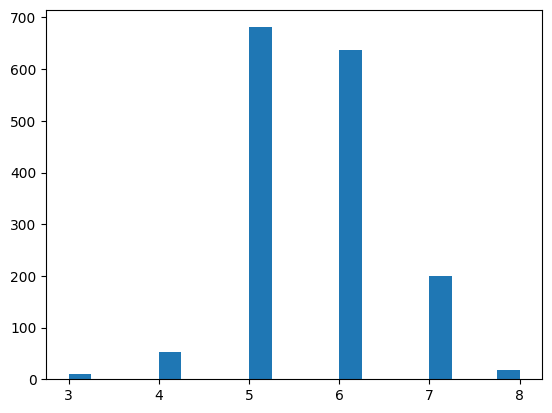

In [ ]:
target_column = df["quality"]
plt.hist(target_column, bins=20)
plt.show()

In [ ]:
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Preprocessing the Dataset

In [ ]:
# Function for data preprocessing
def preprocess_data(data, target_column):
    # Separating features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]

    #print(X)
    #print(y)

    # Handling missing values
    numerical_cols = X.select_dtypes(include=['number']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns

    numerical_transformer = SimpleImputer(strategy='mean')  # Impute missing values with mean
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocessing pipeline
    preprocess_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Preprocessing training and testing data
    X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
    X_test_preprocessed = preprocess_pipeline.transform(X_test)

    return X_train_preprocessed, X_test_preprocessed, y_train, y_test

In [ ]:
preprocess_data(df, target_column="quality")

(array([[ 8.7 ,  0.69,  0.31, ...,  3.48,  0.74, 11.6 ],
        [ 6.1 ,  0.21,  0.4 , ...,  3.25,  0.59, 11.9 ],
        [10.9 ,  0.39,  0.47, ...,  3.3 ,  0.75,  9.8 ],
        ...,
        [ 7.2 ,  0.62,  0.06, ...,  3.51,  0.54,  9.5 ],
        [ 7.9 ,  0.2 ,  0.35, ...,  3.32,  0.8 , 11.9 ],
        [ 5.8 ,  0.29,  0.26, ...,  3.39,  0.54, 13.5 ]]),
 array([[ 7.7  ,  0.56 ,  0.08 , ...,  3.24 ,  0.66 ,  9.6  ],
        [ 7.8  ,  0.5  ,  0.17 , ...,  3.39 ,  0.48 ,  9.5  ],
        [10.7  ,  0.67 ,  0.22 , ...,  3.28 ,  0.98 ,  9.9  ],
        ...,
        [ 8.3  ,  0.6  ,  0.25 , ...,  3.15 ,  0.53 ,  9.8  ],
        [ 8.8  ,  0.27 ,  0.39 , ...,  3.15 ,  0.69 , 11.2  ],
        [ 9.1  ,  0.765,  0.04 , ...,  3.29 ,  0.54 ,  9.7  ]]),
 493     6
 354     6
 342     6
 834     5
 705     5
        ..
 1130    6
 1294    6
 860     5
 1459    7
 1126    6
 Name: quality, Length: 1279, dtype: int64,
 803     6
 124     5
 350     6
 682     5
 1326    6
        ..
 1259    6
 1295   

In [ ]:
X_train,X_test, y_train, y_test = preprocess_data(df, target_column="quality")

#Visualize the data using specific **graphs**

In [ ]:
def visualize_data(data):
    # Visualize distribution of wine quality
    plt.figure(figsize=(8, 6))
    sns.countplot(x='quality', data=data)
    plt.title('Distribution of Wine Quality')
    plt.xlabel('Quality')
    plt.ylabel('Count')
    plt.show()

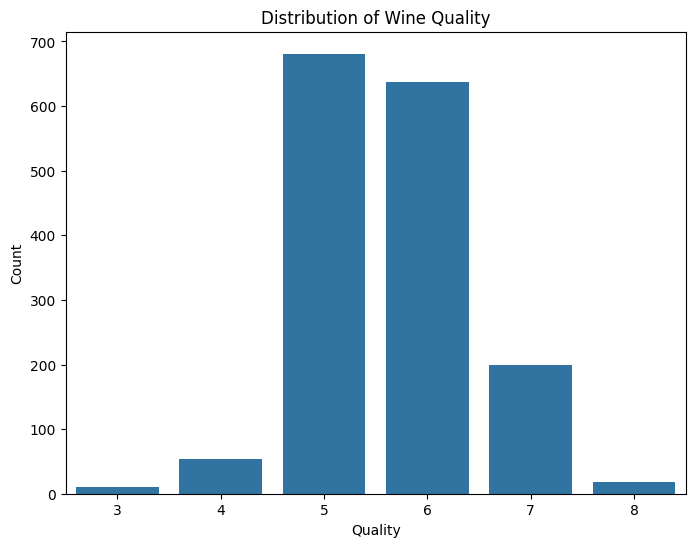

In [ ]:
visualize_data(df)

#Confusion Matrix

In [ ]:
# Function for building the decision tree classifier
def build_decision_tree(X_train, y_train, max_depth=None):
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    return(classifier)

In [ ]:
classifier = build_decision_tree(X_train, y_train)

In [ ]:
# Function for evaluating the model
def evaluate_model(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)


    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
    disp.plot()
    plt.plot()
    return(accuracy, report,confusion_mat)

###Showing Accuracy and Confusion matrix

(0.58125,
 '              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00        10\n           5       0.67      0.67      0.67       130\n           6       0.56      0.58      0.57       132\n           7       0.55      0.52      0.54        42\n           8       0.00      0.00      0.00         5\n\n    accuracy                           0.58       320\n   macro avg       0.30      0.30      0.30       320\nweighted avg       0.58      0.58      0.58       320\n',
 array([[ 0,  0,  0,  1,  0,  0],
        [ 0,  0,  4,  6,  0,  0],
        [ 1,  5, 87, 35,  2,  0],
        [ 0,  4, 36, 77, 14,  1],
        [ 0,  1,  2, 15, 22,  2],
        [ 0,  0,  0,  3,  2,  0]]))

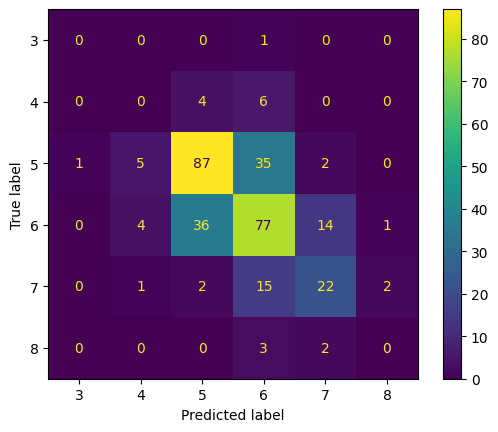

In [ ]:
evaluate_model(classifier, X_test, y_test)

#Constructing Decision Tree

In [ ]:
def visualize_tree(classifier, feature_names):
    plt.figure(figsize=(15, 10))
    class_names = [str(cls) for cls in classifier.classes_]  # Convert class integers to strings
    plot_tree(classifier, feature_names=feature_names.tolist(), class_names=class_names, filled=True)
    plt.show()

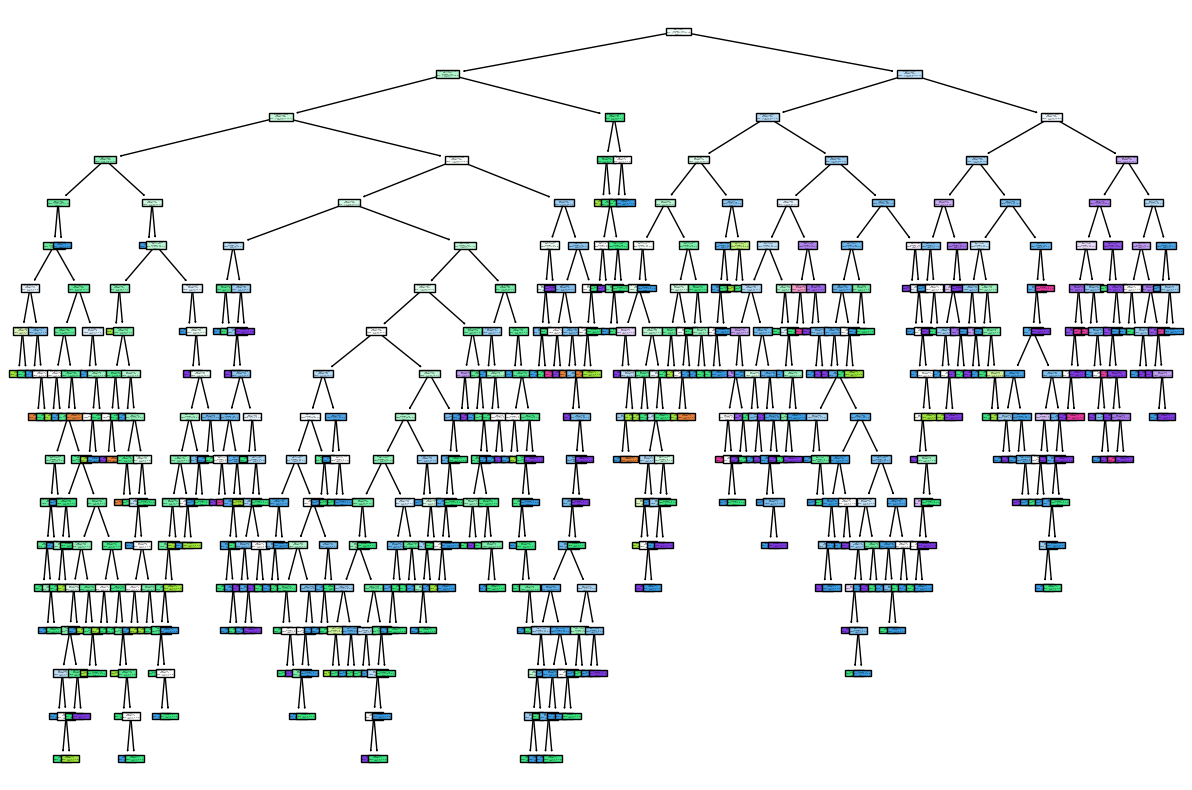

In [ ]:
visualize_tree(classifier, df.columns[:-1]) # Target column "quality" is last column
